# Notes on Chapter 10 of *Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow* by Aurélien Géron

In [1]:
from datetime import datetime
import os
from pathlib import Path

from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sklearn.datasets
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

2023-03-15 01:57:17.437076: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 01:57:17.520633: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-15 01:57:17.896377: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-15 01:57:17.896418: W tensorflow/

In [2]:
tf.__version__

'2.11.0'

In [3]:
keras.__version__

'2.11.0'

In [4]:
tf.config.list_physical_devices()

2023-03-15 01:57:18.716687: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 01:57:18.730529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 01:57:18.730677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Load the fashion MNIST dataset, rescaling image intensities from 0-255 to 0-1.

In [5]:
(X_train_raw, y_train_raw), (X_test_raw, y_test) = keras.datasets.fashion_mnist.load_data()
X_test_raw = X_test_raw/255
X_train, X_valid, y_train, y_valid = train_test_split(X_train_raw/255, y_train_raw, test_size=5000, random_state=42) 

In [6]:
# from https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

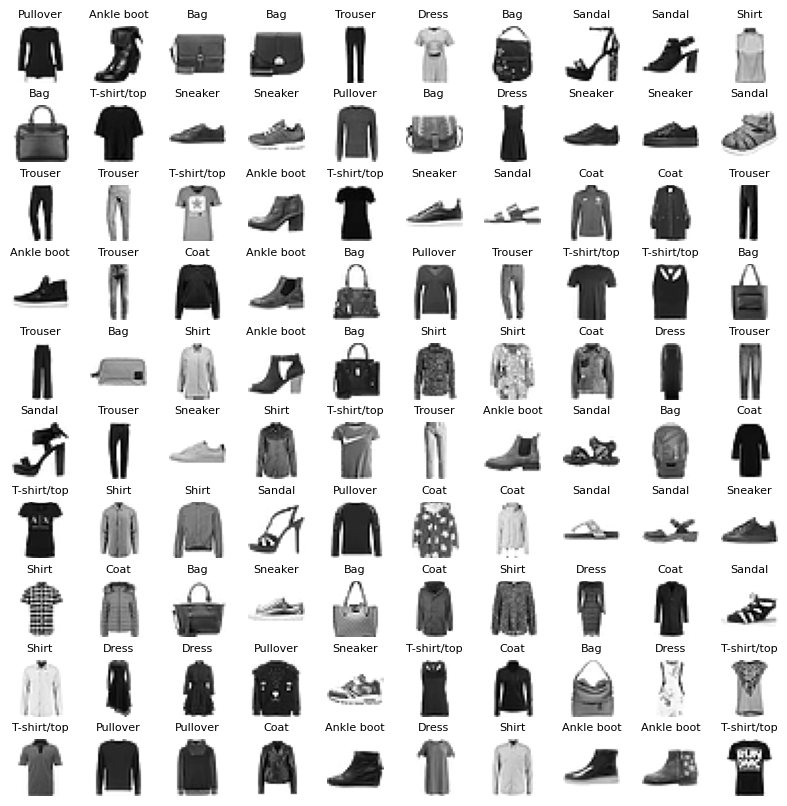

In [7]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
plt.subplots_adjust(hspace=0.4)

for i in range(10):
    for j in range(10):
        k = i + 10*j
        axs[i,j].imshow(X_train[k], cmap="binary")
        axs[i,j].axis('off')
        axs[i,j].set_title(class_names[y_train[k]], fontsize=8)

In [8]:
tf.keras.utils.set_random_seed(42)

In [9]:
m = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

2023-03-15 01:57:21.773883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 01:57:21.774130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 01:57:21.774209: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 01:57:22.389862: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 01:57:22.390268: I tensorflow/compiler/xla/stream_executo

In [10]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
weights, biases = m.layers[3].get_weights()
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
m.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

One option is to pass a validation dataset to the fit function...

In [13]:
fithist = m.fit(X_train, y_train, epochs=20, validation_data=[X_valid, y_valid], batch_size=512)

Epoch 1/20


2023-03-15 01:57:24.194538: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


108/108 [==============================] - 2s 3ms/step - loss: 0.6272 - accuracy: 0.7855 - val_loss: 0.4545 - val_accuracy: 0.8384
Epoch 2/20
108/108 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8567 - val_loss: 0.4127 - val_accuracy: 0.8506
Epoch 3/20
108/108 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8717 - val_loss: 0.3653 - val_accuracy: 0.8696
Epoch 4/20
108/108 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8789 - val_loss: 0.3658 - val_accuracy: 0.8694
Epoch 5/20
108/108 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8862 - val_loss: 0.3508 - val_accuracy: 0.8734
Epoch 6/20
108/108 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8929 - val_loss: 0.3389 - val_accuracy: 0.8780
Epoch 7/20
108/108 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8979 - val_loss: 0.3423 - val_accuracy: 0.8740
Epoch 8/20
108/10

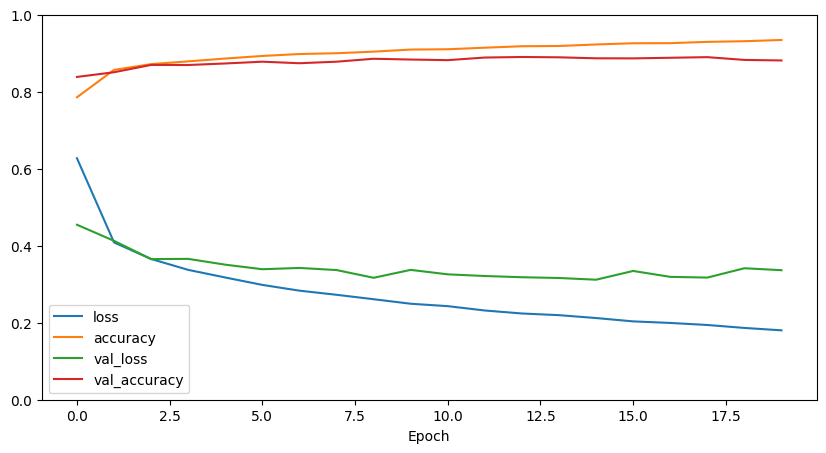

In [14]:
pd.DataFrame(fithist.history).plot(figsize=(10,5))
plt.ylim((0,1))
plt.xlabel("Epoch");

Another option is to pass a validation_split fraction rather than a validation dataset

In [15]:
m.fit(X_train, y_train, epochs=2, validation_split=0.1, batch_size=512)

Epoch 1/2
97/97 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9356 - val_loss: 0.1768 - val_accuracy: 0.9367
Epoch 2/2
97/97 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9367 - val_loss: 0.1839 - val_accuracy: 0.9304


In [16]:
fithist.params

{'verbose': 1, 'epochs': 20, 'steps': 108}

In [17]:
fithist.epoch[-10:]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [18]:
m.predict(X_valid[:1])

1/1 [==============================] - 0s 47ms/step


array([[5.7913774e-12, 3.4885859e-15, 1.9473531e-12, 3.1808330e-14,
        3.8959118e-12, 3.0892335e-13, 1.5565726e-14, 8.0438139e-12,
        1.0000000e+00, 1.6958222e-15]], dtype=float32)

Load the California housing dataset

In [19]:
X_raw, y = sklearn.datasets.fetch_california_housing(return_X_y=True)
X_raw_train, X_raw_test, y_train, y_test = train_test_split(X_raw, y, train_size=0.9)

s = StandardScaler()
s.fit(X_raw_train)
X_train = s.transform(X_raw_train)
X_test = s.transform(X_raw_test)

In [20]:
m = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1),
])
m.compile(loss="mean_squared_error", optimizer="Adam")
hist = m.fit(X_train, y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
print(f"MSE: {m.evaluate(X_test, y_test):.3f}")

65/65 [==============================] - 0s 594us/step - loss: 0.3114
MSE: 0.311


<Axes: >

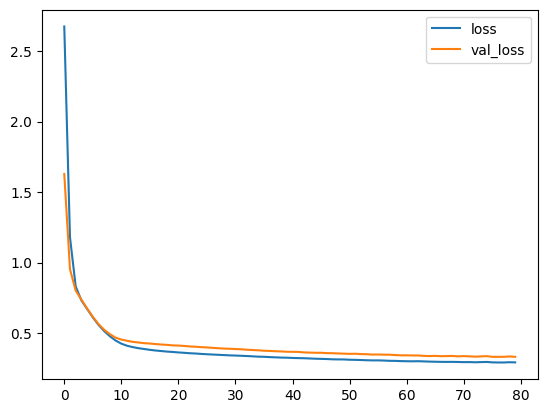

In [21]:
pd.DataFrame(hist.history).plot()

### Saving and loading models

In [22]:
m.save("handson-ml-09-model-1.h5")

In [23]:
m2 = keras.models.load_model("handson-ml-09-model-1.h5")
print(f"MSE: {m2.evaluate(X_test, y_test):.3f}")

65/65 [==============================] - 0s 730us/step - loss: 0.3114
MSE: 0.311


# Wide and deep network example (with functional syntax)

65/65 [==============================] - 0s 673us/step - loss: 0.3150
MSE: 0.315


<Axes: >

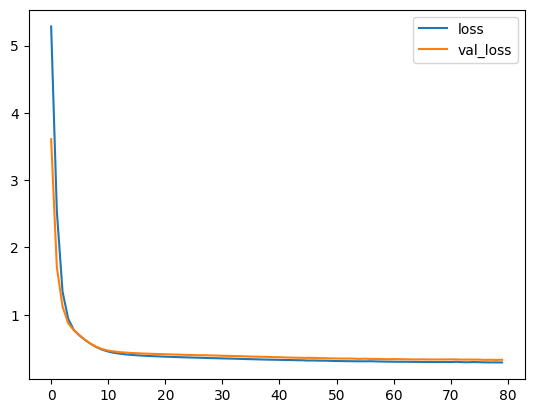

In [24]:
inputs = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu', name="hidden1")(inputs)
hidden2 = keras.layers.Dense(30, activation='relu', name="hidden2")(hidden1)
concat = keras.layers.Concatenate()([inputs, hidden2])
outputs = keras.layers.Dense(1)(concat)
m = keras.Model(inputs=[inputs], outputs=[outputs])

m.compile(loss="mean_squared_error", optimizer="Adam")
hist = m.fit(X_train, y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
print(f"MSE: {m.evaluate(X_test, y_test):.3f}")
pd.DataFrame(hist.history).plot()

In [25]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 hidden2 (Dense)                (None, 30)           930         ['hidden1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'hidden2[0][0]']            

### Example of multiple inputs:

In [26]:
X_train_A = X_train[:, :5]
X_train_B = X_train[:, 5:]
X_test_A = X_test[:, :5]
X_test_B = X_test[:, 5:]

In [27]:
input_A = keras.layers.Input(shape=X_train_A.shape[1:], name="inputA")
input_B = keras.layers.Input(shape=X_train_B.shape[1:], name="inputB")
hidden1 = keras.layers.Dense(30, activation='relu', name="hidden1")(input_B)
hidden2 = keras.layers.Dense(30, activation='relu', name="hidden2")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
outputs = keras.layers.Dense(1)(concat)
m = keras.Model(inputs=[input_A, input_B], outputs=[outputs])
m.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputB (InputLayer)            [(None, 3)]          0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 30)           120         ['inputB[0][0]']                 
                                                                                                  
 inputA (InputLayer)            [(None, 5)]          0           []                               
                                                                                                  
 hidden2 (Dense)                (None, 30)           930         ['hidden1[0][0]']                
                                                                                            

65/65 [==============================] - 0s 613us/step - loss: 0.3763
MSE: 0.376


<Axes: >

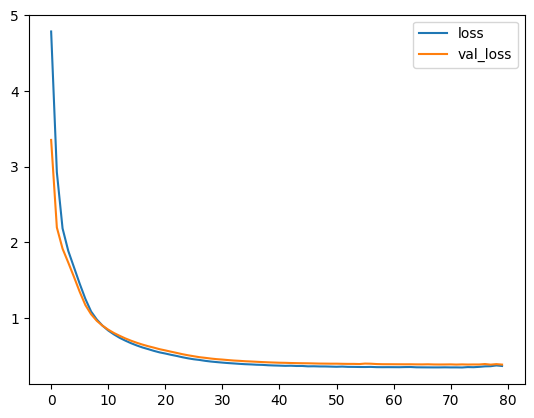

In [28]:
m.compile(loss="mean_squared_error", optimizer="Adam")
hist = m.fit([X_train_A, X_train_B], y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
print(f"MSE: {m.evaluate([X_test_A, X_test_B], y_test):.3f}")
pd.DataFrame(hist.history).plot()

### Example with multiple outputs (and inputs)

In [29]:
input_A = keras.layers.Input(shape=X_train_A.shape[1:], name="inputA")
input_B = keras.layers.Input(shape=X_train_B.shape[1:], name="inputB")
hidden1 = keras.layers.Dense(30, activation='relu', name="hidden1")(input_B)
hidden2 = keras.layers.Dense(30, activation='relu', name="hidden2")(hidden1)
output_aux = keras.layers.Dense(1, name="outputAux")(hidden2)
concat = keras.layers.Concatenate()([input_A, hidden2])
output_main = keras.layers.Dense(1, name="outputMain")(concat)
m = keras.Model(inputs=[input_A, input_B], outputs=[output_main, output_aux])
m.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputB (InputLayer)            [(None, 3)]          0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 30)           120         ['inputB[0][0]']                 
                                                                                                  
 inputA (InputLayer)            [(None, 5)]          0           []                               
                                                                                                  
 hidden2 (Dense)                (None, 30)           930         ['hidden1[0][0]']                
                                                                                            

65/65 [==============================] - 0s 927us/step - loss: 1.0842 - outputMain_loss: 0.3731 - outputAux_loss: 0.7110
MSE: main: 0.37, aux: 0.711, total: 1.084


<Axes: >

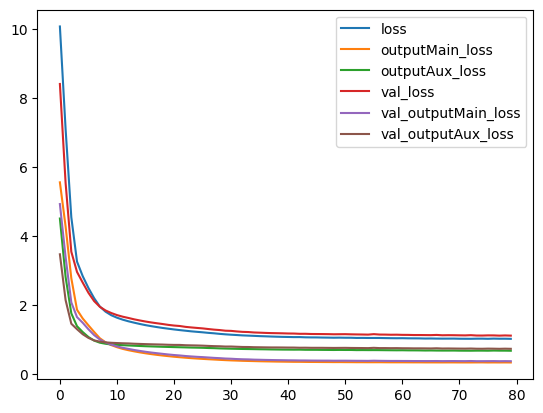

In [30]:
m.compile(loss=["mean_squared_error", "mean_squared_error"], optimizer="Adam")
hist = m.fit([X_train_A, X_train_B], y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
loss_total, loss_main, loss_aux = m.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f"MSE: main: {loss_main:.2f}, aux: {loss_aux:.3f}, total: {loss_total:.3f}")
pd.DataFrame(hist.history).plot()

### Custom model example:

In [31]:
class MyModel(keras.Model):
    def __init__(self, width=20, depth=4, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [
            keras.layers.Dense(width, name=f"hidden_{i}", activation="relu")
            for i in range(depth)
        ]
        self.main_output = keras.layers.Dense(1, name="output_main")
        self.aux_output = keras.layers.Dense(1, name="output_aux")
        
    def call(self, inputs):
        z = keras.layers.concatenate(inputs) # combine input_A and input_B into a single vector
        for i in range(len(self.hidden)):
            z = self.hidden[i](z)
            if i == len(self.hidden) // 2:
                z_aux = self.aux_output(z)
        z_main = self.main_output(z)
        return z_main, z_aux
    
m = MyModel()

65/65 [==============================] - 0s 907us/step - loss: 0.6334 - output_1_loss: 0.3142 - output_2_loss: 0.3192
MSE: main: 0.31, aux: 0.319, total: 0.633


<Axes: >

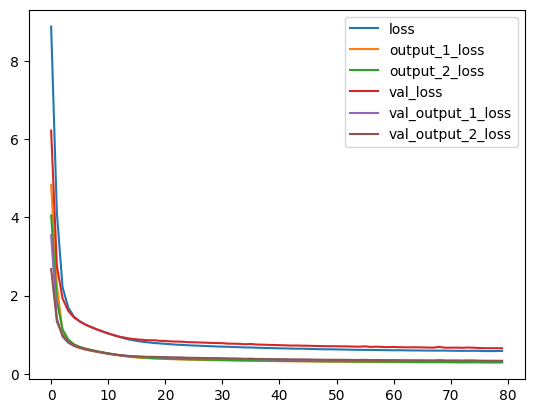

In [32]:
m.compile(loss=["mean_squared_error", "mean_squared_error"], optimizer="Adam")
hist = m.fit([X_train_A, X_train_B], y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
loss_total, loss_main, loss_aux = m.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f"MSE: main: {loss_main:.2f}, aux: {loss_aux:.3f}, total: {loss_total:.3f}")
pd.DataFrame(hist.history).plot()

In [33]:
m.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_0 (Dense)            multiple                  180       
                                                                 
 hidden_1 (Dense)            multiple                  420       
                                                                 
 hidden_2 (Dense)            multiple                  420       
                                                                 
 hidden_3 (Dense)            multiple                  420       
                                                                 
 output_main (Dense)         multiple                  21        
                                                                 
 output_aux (Dense)          multiple                  21        
                                                                 
Total params: 1,482
Trainable params: 1,482
Non-trainable 

### Models as custom layers:

65/65 [==============================] - 0s 632us/step - loss: 0.4381
MSE: 0.438


<Axes: >

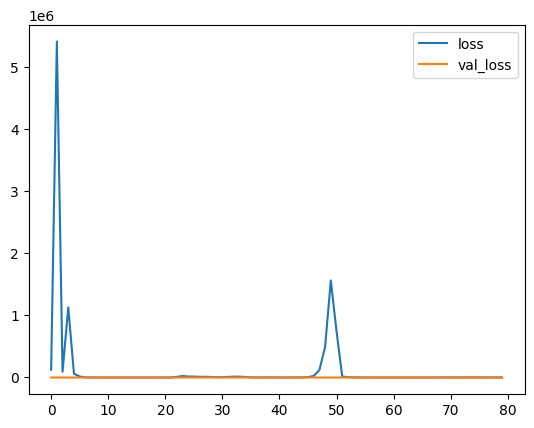

In [34]:
class CubedRelu(keras.Model):
    def __init__(self, units, **kwargs):
        super().__init__(**kwargs)
        self.layer = keras.layers.Dense(units, activation="relu")
        
    def call(self, inputs):
        result = self.layer(inputs)
        return result + 0.01*result**3
    
m = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    CubedRelu(30),
    CubedRelu(30),
    keras.layers.Dense(1),
])
m.compile(loss="mean_squared_error", optimizer="Adam")
hist = m.fit(X_train, y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
print(f"MSE: {m.evaluate(X_test, y_test):.3f}")
pd.DataFrame(hist.history).plot()

### Example of saving checkpoints of best model so far during training:

In [35]:
m = keras.models.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(1),
])
m.compile(loss="mean_squared_error", optimizer="Adam")

65/65 [==============================] - 0s 616us/step - loss: 0.2828
MSE last: 0.283
65/65 [==============================] - 0s 710us/step - loss: 0.2755
MSE best: 0.275


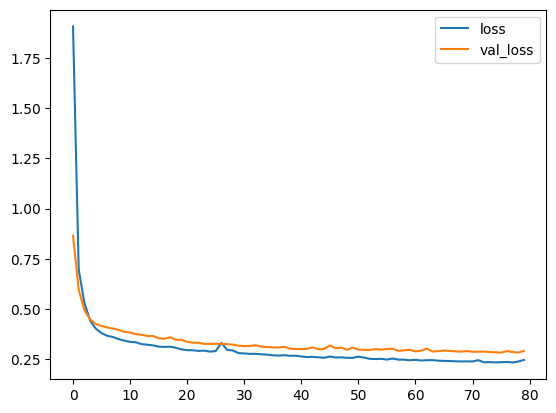

In [36]:
callbacks = [keras.callbacks.ModelCheckpoint("handson-ml-09-model-2-best.h5", save_best_only=True)]
hist = m.fit(X_train, y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False, callbacks=callbacks)
pd.DataFrame(hist.history).plot()
print(f"MSE last: {m.evaluate(X_test, y_test):.3f}")

m2 = keras.models.load_model("handson-ml-09-model-2-best.h5")
print(f"MSE best: {m2.evaluate(X_test, y_test):.3f}")

### Example of an early-stopping callback:

65/65 [==============================] - 0s 815us/step - loss: 0.2687
MSE last: 0.269


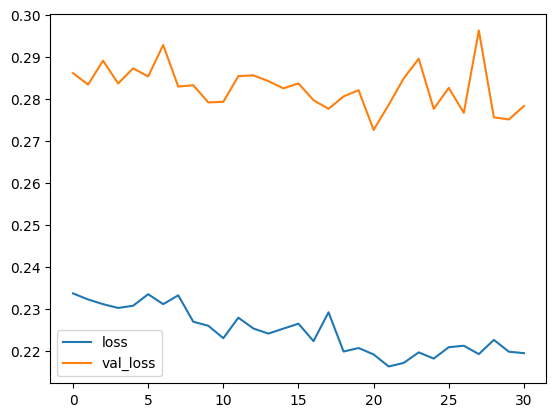

In [37]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
hist = m.fit(X_train, y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False, callbacks=callbacks)
pd.DataFrame(hist.history).plot()
print(f"MSE last: {m.evaluate(X_test, y_test):.3f}")

### Custom callback example

Epoch: 0: vaidation to training loss ratio: 1.28
Epoch: 10: vaidation to training loss ratio: 1.30
Epoch: 20: vaidation to training loss ratio: 1.30
Epoch: 30: vaidation to training loss ratio: 1.36
Epoch: 40: vaidation to training loss ratio: 1.33
Epoch: 50: vaidation to training loss ratio: 1.37
Epoch: 60: vaidation to training loss ratio: 1.46
Epoch: 70: vaidation to training loss ratio: 1.47


<Axes: >

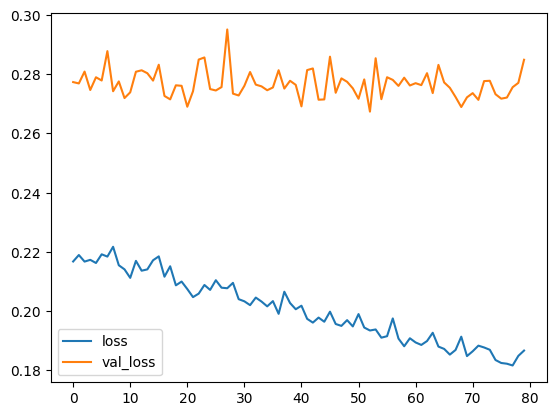

In [38]:
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0:
            print(f"Epoch: {epoch}: vaidation to training loss ratio: {logs['val_loss'] / logs['loss']:.2f}")

callbacks = [MyCallback()]
hist = m.fit(X_train, y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False, callbacks=callbacks)
pd.DataFrame(hist.history).plot()

### A tensorboard example:

In [39]:
logdir_root = Path(".").absolute() / ".tf_logs"
logdir_current = logdir_root / datetime.utcnow().isoformat().replace(':','_')

In [40]:
inputs = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu', name="hidden1")(inputs)
hidden2 = keras.layers.Dense(30, activation='relu', name="hidden2")(hidden1)
concat = keras.layers.Concatenate()([inputs, hidden2])
outputs = keras.layers.Dense(1)(concat)
m = keras.Model(inputs=[inputs], outputs=[outputs])
m.compile(loss="mean_squared_error", optimizer="Adam")

65/65 [==============================] - 0s 655us/step - loss: 0.3198
MSE: 0.32


<Axes: >

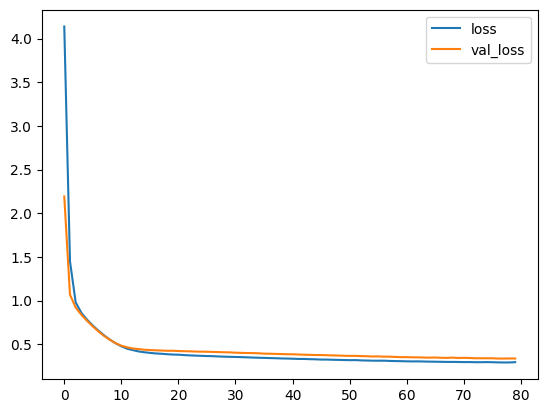

In [41]:
callbacks = keras.callbacks.TensorBoard(logdir_current)
hist = m.fit(X_train, y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False, callbacks=callbacks)
print(f"MSE: {m.evaluate(X_test, y_test):.2f}")
pd.DataFrame(hist.history).plot()

In [42]:
%load_ext tensorboard

In [43]:
# we call the magic function programatically as 
get_ipython().run_line_magic("tensorboard", f"--logdir {logdir_root} --port {os.getenv('TENSORBOARD_PORT')} --bind_all")